## Verilerin Temizlenmesi

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('laptop_price.csv' , encoding="ISO-8859-1")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.shape

(1303, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
df.duplicated().sum() #Tekrar eden veri var mı kontrolü

0

In [8]:
df.isnull().sum()  #Boş - Null veri var mı kontrolü

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [10]:
df = df.rename(columns=str.lower) #Sütunların isimlerinin küçük harfe çevrilmesi (laptop_ID -> laptop_id)

In [11]:
df.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [12]:
df = df.drop('laptop_id', axis = 1) #Genellikle id kavramı veritabanı için kullanıldığından veri analizinde modele bir katkı sağlamaz
# ve belleği yormaması için kaldırılır.

### RAM

In [13]:
df['ram'] 

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: ram, Length: 1303, dtype: object

In [14]:
df['ram'] = df['ram'].str.replace('GB','') 

In [15]:
df.rename(columns = {'ram':'ram(GB)'}, inplace = True) 

In [16]:
df['ram(GB)'] = df['ram(GB)'].astype('int')

In [17]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,opsys,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Weight

In [19]:
df['weight'].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: weight, Length: 179, dtype: int64

In [20]:
df['weight'].str.contains('kg').sum()  #Hepsinde birim kg mi?

1303

In [21]:
df['weight'] = df['weight'].str.replace('kg','').astype(float)

In [22]:
df.rename(columns = {'weight':'weight(kg)'}, inplace = True)

### Screen resolution

#### Resolution (çözünürlük)

In [23]:
df["screenresolution"]

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: screenresolution, Length: 1303, dtype: object

- Ekran tipi
- Çözünürlük
- Dokunmatik özelliği

In [24]:
df['resolution'] = df['screenresolution'].str.extract(r'(\d+x\d+)')

Bu kod, bir DataFrame olan df içindeki 'screenresolution' sütunundaki değerlerden çözünürlük bilgisini çıkarmak için kullanılır ve bu çözünürlük bilgisini yeni bir 'resolution' sütunu olarak ekler.

.str.extract(r'(\d+x\d+)') ifadesi, 'screenresolution' sütunundaki her bir değeri bir dize olarak ele alır ve içindeki deseni bulmaya çalışır. Desen, \d+x\d+ şeklindedir ve şunları ifade eder:

\d+: Bir veya daha fazla rakam

x: Harf "x"

\d+: Bir veya daha fazla rakam

Yani, bu desen, bir veya daha fazla rakamı, ardından "x" harfini ve tekrar bir veya daha fazla rakamı içeren bir dizeyi yakalar. Bu yakalanan dize, çözünürlük bilgisini temsil eder.

Sonuç olarak, bu kod, DataFrame'deki her bir 'screenresolution' değerini analiz eder, çözünürlük bilgisini yakalar ve bu bilgiyi 'resolution' sütununa ekler.

In [25]:
df['resolution']

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: resolution, Length: 1303, dtype: object

#### ScreenType (ekran tipi)

In [26]:
df['screentype'] = df['screenresolution'].replace(r'(\d+x\d+)','',regex=True)

In [27]:
df['screentype']

0               IPS Panel Retina Display 
1                                        
2                                Full HD 
3               IPS Panel Retina Display 
4               IPS Panel Retina Display 
                      ...                
1298     IPS Panel Full HD / Touchscreen 
1299    IPS Panel Quad HD+ / Touchscreen 
1300                                     
1301                                     
1302                                     
Name: screentype, Length: 1303, dtype: object

In [28]:
df['screentype'] = df['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)

In [29]:
df['screentype']

0       IPS Panel Retina Display 
1                                
2                                
3       IPS Panel Retina Display 
4       IPS Panel Retina Display 
                  ...            
1298     IPS Panel   Touchscreen 
1299     IPS Panel   Touchscreen 
1300                             
1301                             
1302                             
Name: screentype, Length: 1303, dtype: object

#### Touch Screen (Dokunmatik özelliği)

In [30]:
df['touchscreen'] = df['screentype'].str.extract(r'(Touchscreen)')

In [31]:
df['touchscreen']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1298    Touchscreen
1299    Touchscreen
1300            NaN
1301            NaN
1302            NaN
Name: touchscreen, Length: 1303, dtype: object

In [32]:
df['screentype'] = df['screentype'].replace(r'(Touchscreen)','',regex=True)

In [33]:
df['touchscreen'].value_counts()

Touchscreen    192
Name: touchscreen, dtype: int64

In [34]:
df['touchscreen'] = df['touchscreen'].replace('Touchscreen',1)
df['touchscreen'] = df['touchscreen'].replace(np.nan,0)

In [35]:
df['touchscreen'].value_counts()

0.0    1111
1.0     192
Name: touchscreen, dtype: int64

In [36]:
df['touchscreen']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1298    1.0
1299    1.0
1300    0.0
1301    0.0
1302    0.0
Name: touchscreen, Length: 1303, dtype: float64

In [37]:
df['screentype'].value_counts()

                             549
                             314
IPS Panel                    265
                              75
IPS Panel                     72
IPS Panel Retina Display      17
IPS Panel                     11
Name: screentype, dtype: int64

In [38]:
df['screentype']

0       IPS Panel Retina Display 
1                                
2                                
3       IPS Panel Retina Display 
4       IPS Panel Retina Display 
                  ...            
1298                IPS Panel    
1299                IPS Panel    
1300                             
1301                             
1302                             
Name: screentype, Length: 1303, dtype: object

In [39]:
df['screentype']=df['screentype'].replace(r' ','',regex=True)
df['screentype'].value_counts()

                         938
IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

Desen, ^\s$ şeklindedir ve şunları ifade eder:*

- ^: Satırın başı
- \s*: Sıfır veya daha fazla boşluk karakteri
- $: Satırın sonu
Yani, bu desen, bir satırda baştan sona kadar sadece boşluk karakterlerinden oluşan bir dizeyi bulur.

In [40]:
df['screentype'] = df['screentype'].replace(r'^\s*$', np.nan, regex=True)
df['screentype'].value_counts()

IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [41]:
df['screentype']

0       IPSPanelRetinaDisplay
1                         NaN
2                         NaN
3       IPSPanelRetinaDisplay
4       IPSPanelRetinaDisplay
                ...          
1298                 IPSPanel
1299                 IPSPanel
1300                      NaN
1301                      NaN
1302                      NaN
Name: screentype, Length: 1303, dtype: object

In [42]:
df = df.drop('screenresolution', axis=1)

In [43]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(kg),price_euros,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0


### CPU

In [44]:
df['cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: cpu, Length: 1303, dtype: object

In [45]:
df['cpu_freq'] = df['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 

In [46]:
df['cpu_freq'].value_counts()

2.5GHz     290
2.7GHz     165
2.8GHz     165
1.6GHz     133
2.3GHz      86
1.8GHz      78
2.6GHz      76
2GHz        67
1.1GHz      53
2.4GHz      52
2.9GHz      21
3GHz        19
2.0GHz      19
1.2GHz      15
1.44GHz     12
2.2GHz      11
1.5GHz      10
1.3GHz       6
3.6GHz       5
0.9GHz       4
3.1GHz       3
2.1GHz       3
2.50GHz      3
1.9GHz       2
1.60GHz      1
3.2GHz       1
1.0GHz       1
1.92GHz      1
2.70GHz      1
Name: cpu_freq, dtype: int64

In [47]:
df['cpu_freq'] = df['cpu_freq'].str.replace('GHz', '')

In [48]:
df.rename(columns = {'cpu_freq' : 'cpu_freq(GHz)'}, inplace=True)

In [49]:
df['cpu_freq(GHz)']

0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1298    2.5
1299    2.5
1300    1.6
1301    2.5
1302    1.6
Name: cpu_freq(GHz), Length: 1303, dtype: object

In [50]:
df['cpu_freq(GHz)'] = df['cpu_freq(GHz)'].astype('float')

In [51]:
df['cpu'] = df['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)','',regex = True) 

In [52]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(kg),price_euros,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1


### Memory

In [53]:
df['memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [54]:
df['memory_1']=df['memory']

In [55]:
df['memory_1']=df['memory_1'].str.replace('1.0TB','1TB', regex=True)
df['memory_1']=df['memory_1'].str.replace('1TB','1000GB')
df['memory_1']=df['memory_1'].str.replace('2TB','2000GB')
df['memory_1']=df['memory_1'].str.replace('GB','')
df['memory_1'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [56]:
df['memory2']=df['memory_1'].str.replace(r' ','')
df['memory2'].value_counts()

256SSD                    412
1000HDD                   224
500HDD                    132
512SSD                    118
128SSD+1000HDD             94
128SSD                     76
256SSD+1000HDD             73
32FlashStorage             38
2000HDD                    16
64FlashStorage             15
512SSD+1000HDD             14
1000SSD                    14
256SSD+2000HDD             10
1000Hybrid                  9
256FlashStorage             8
16FlashStorage              7
32SSD                       6
180SSD                      5
128FlashStorage             4
512SSD+2000HDD              3
16SSD                       3
512FlashStorage             2
1000SSD+1000HDD             2
256SSD+500HDD               2
128SSD+2000HDD              2
256SSD+256SSD               2
512SSD+256SSD               1
512SSD+512SSD               1
64FlashStorage+1000HDD      1
1000HDD+1000HDD             1
32HDD                       1
64SSD                       1
128HDD                      1
240SSD    

In [57]:
df['memory2'].head()

0             128SSD
1    128FlashStorage
2             256SSD
3             512SSD
4             256SSD
Name: memory2, dtype: object

In [59]:
import regex as re

In [60]:

memory_1=[]
memory_2=[]
for i in df['memory2']:
    if len(re.findall(r'\+',i))==1: # DOUBLE DRIVE
        one=re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append(one[1])
    else: # SINGLE DRIVE
        one=re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append('NaN')

In [61]:
memory_1[0:10]

['128SSD',
 '128FlashStorage',
 '256SSD',
 '512SSD',
 '256SSD',
 '500HDD',
 '256FlashStorage',
 '256FlashStorage',
 '512SSD',
 '256SSD']

In [62]:
memory_1_gb=[]
memory_1_type=[]

for i in memory_1:
    memory_1_type.append(re.findall(r'(\D\w+)',i)[0])
    memory_1_gb.append(re.findall(r'(\d+)',i)[0])

In [63]:
memory_2_gb=[]
memory_2_type=[]
for i in memory_2:
    if i != 'NaN':
        memory_2_type.append(re.findall(r'(\D\w+)',i)[0])
        memory_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        memory_2_type.append('NaN')
        memory_2_gb.append(0)

In [64]:
df['memory_1_sto(GB)'] = memory_1_gb
df['memory_1_type'] = memory_1_type
df['memory_2_sto(GB)'] = memory_2_gb
df['memory_2_type'] = memory_2_type

In [65]:
df['memory_1_sto(GB)'] = df['memory_1_sto(GB)'].astype(float)
df['memory_2_sto(GB)'] = df['memory_2_sto(GB)'].astype(float)

In [66]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(kg),...,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1,memory2,memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128 SSD,128SSD,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1440x900,NaN,0.0,1.8,128 Flash Storage,128FlashStorage,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,1920x1080,NaN,0.0,2.5,256 SSD,256SSD,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512 SSD,512SSD,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256 SSD,256SSD,256.0,SSD,0.0,NaN


In [67]:
df=df.drop(['memory_1','memory2','memory'], axis=1)

In [68]:
df = df.replace({'NaN': np.nan})

In [69]:
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN


### CPU VE GPU Şirketleri

In [70]:
df['cpu'].value_counts()

Intel Core i5 7200U      193
Intel Core i7 7700HQ     147
Intel Core i7 7500U      135
Intel Core i3 6006U       81
Intel Core i7 8550U       73
                        ... 
AMD FX 9830P               1
Intel Core i5 6440HQ       1
AMD E-Series E2-6110       1
AMD Ryzen 1600             1
Intel Core i7 6920HQ       1
Name: cpu, Length: 93, dtype: int64

In [71]:
df['cpu_brand'] = df['cpu'].str.extract(r'^(\w+)')
df['cpu_brand'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: cpu_brand, dtype: int64

df['cpu'] : DataFrame'deki "cpu" sütununu seçer.
- .str.extract() : Seçilen sütunun her bir değerine bir dize yöntemi uygular ve bu ifade içindeki deseni arar.
- r'^(\w+)' : Bu desen, başında bir veya daha fazla harf içeren bir kelimeyi yakalar. İçerdiği öğelerin anlamları şunlardır:
- ^ : Satırın başını temsil eder.
- () : Yakalama grubunu belirtir. Bu durumda, grup, başındaki harfleri yakalamak için kullanılır.
- \w : Herhangi bir harf, rakam veya alt çizgi karakterini temsil eder.
- \+ : Önceki öğenin bir veya daha fazla kez tekrarlandığını belirtir.

In [72]:
df[df['cpu_brand']=='Samsung']

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,Samsung Cortex A72&A53,4,ARM Mali T860 MP4,Chrome OS,1.15,659.0,2400x1600,IPSPanel,1.0,2.0,32.0,FlashStorage,0.0,NaN,Samsung


In [73]:
df=df.drop(1191) #Bir tane veri modelin performansını arttırmayıp azaltacağından (öğrenmede zorluk) verisetinden düşürülür.

In [74]:
df['gpu']

0       Intel Iris Plus Graphics 640
1             Intel HD Graphics 6000
2              Intel HD Graphics 620
3                 AMD Radeon Pro 455
4       Intel Iris Plus Graphics 650
                    ...             
1298           Intel HD Graphics 520
1299           Intel HD Graphics 520
1300               Intel HD Graphics
1301              AMD Radeon R5 M330
1302               Intel HD Graphics
Name: gpu, Length: 1302, dtype: object

In [75]:
df['gpu_brand'] = df['gpu'].str.extract(r'^(\w+)')

In [76]:
df['gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: gpu_brand, dtype: int64

In [77]:
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price_euros,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1302 non-null   object 
 1   product           1302 non-null   object 
 2   typename          1302 non-null   object 
 3   inches            1302 non-null   float64
 4   cpu               1302 non-null   object 
 5   ram(GB)           1302 non-null   int32  
 6   gpu               1302 non-null   object 
 7   opsys             1302 non-null   object 
 8   weight(kg)        1302 non-null   float64
 9   price_euros       1302 non-null   float64
 10  resolution        1302 non-null   object 
 11  screentype        364 non-null    object 
 12  touchscreen       1302 non-null   float64
 13  cpu_freq(GHz)     1302 non-null   float64
 14  memory_1_sto(GB)  1302 non-null   float64
 15  memory_1_type     1302 non-null   object 
 16  memory_2_sto(GB)  1302 non-null   float64


In [79]:
df.to_csv('laptop-clean.csv', index=False) 

## Verilerin Görselleştirilmesi

In [85]:
clean_data = pd.read_csv("laptop-clean.csv")

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

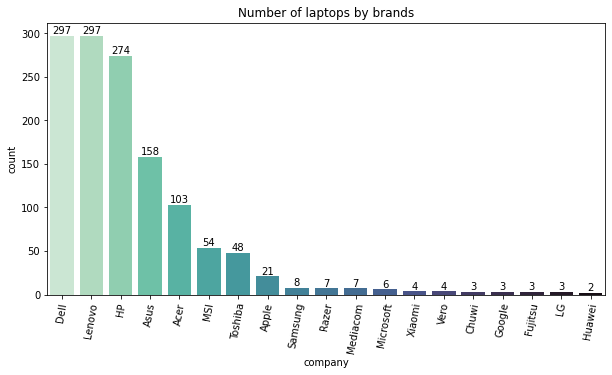

In [86]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='company', data=df, palette='mako_r', order = clean_data['company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brands')
plt.show()

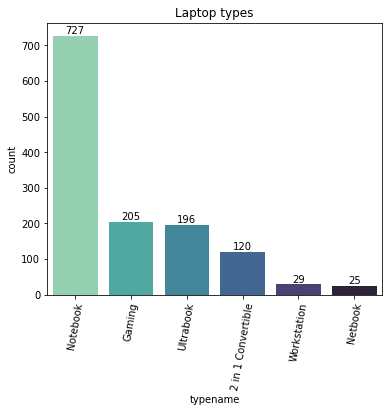

In [87]:
fig, ax  = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='typename', data=df,palette='mako_r', order = clean_data['typename'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop types')
plt.show()

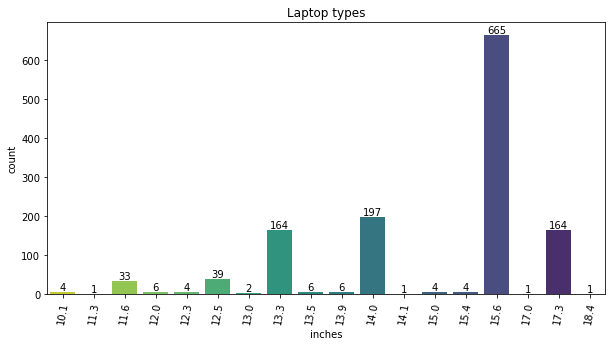

In [88]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(x = 'inches', data = clean_data, palette = "viridis_r")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop types')
plt.show()

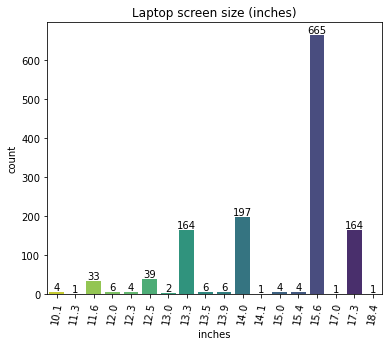

In [91]:
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.countplot(x = 'inches', data=clean_data, palette="viridis_r")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.bar_label(ax.containers[0])
plt.title("Laptop screen size (inches)")
plt.show()

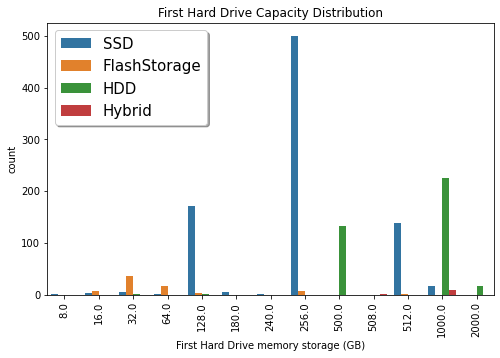

In [98]:
fig, ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory_1_sto(GB)', data=df, hue='memory_1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('First Hard Drive memory storage (GB)')
plt.title('First Hard Drive Capacity Distribution')
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

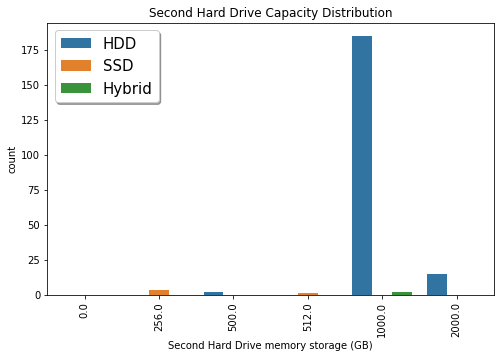

In [99]:
fig, ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory_2_sto(GB)', data=df, hue='memory_2_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Second Hard Drive memory storage (GB)')
plt.title('Second Hard Drive Capacity Distribution')
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

### Korelasyon Matrisi

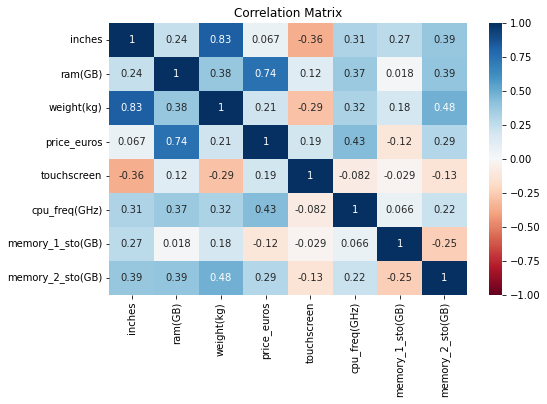

In [101]:
plt.figure(figsize=(8,5))
sns.heatmap(clean_data.corr(), cmap= 'RdBu', annot = True, vmin = -1, vmax = 1)
plt.title('Correlation Matrix');
plt.show();

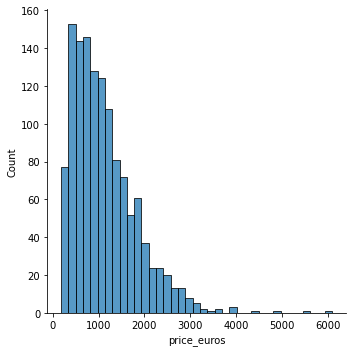

In [103]:
sns.displot(clean_data['price_euros']);

**Ayrıca, 'fiyat' hedef değişkeni sağa çarpık olduğundan, algoritmaların tahmin performansını iyileştirmek için onu log dönüşümüne tabi tutacağız.**

In [107]:
clean_data['price']=np.log(clean_data['price_euros'])

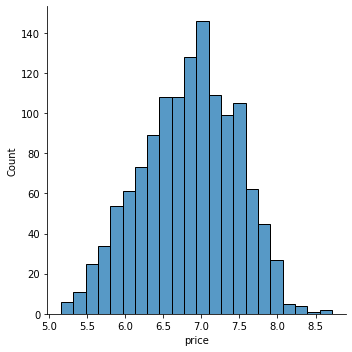

In [108]:
sns.displot(clean_data['price']);

In [110]:
clean_data=clean_data.fillna('NaN')

### Kategorik değerlere encoding işlemi

In [112]:
catCols = []
for i in clean_data.columns:
    print(i)
    if clean_data[i].dtype == "object":
        catCols.append(i)

company
product
typename
inches
cpu
ram(GB)
gpu
opsys
weight(kg)
price_euros
resolution
screentype
touchscreen
cpu_freq(GHz)
memory_1_sto(GB)
memory_1_type
memory_2_sto(GB)
memory_2_type
cpu_brand
gpu_brand
price


In [113]:
catCols =  ['company','product','typename','cpu','gpu','opsys','resolution','screentype','resolution','memory_1_type','memory_2_type','gpu_brand','cpu_brand']

In [114]:
from sklearn.preprocessing import LabelEncoder

In [116]:
en = LabelEncoder()
for cols in catCols:
    clean_data[cols] = en.fit_transform(clean_data[cols])

In [117]:
clean_data.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price_euros,...,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand,price
0,1,299,4,13.3,51,8,57,8,1.37,1339.69,...,1,0.0,2.3,128.0,3,0.0,2,1,1,7.200194
1,1,300,4,13.3,51,8,50,8,1.34,898.94,...,2,0.0,1.8,128.0,0,0.0,2,1,1,6.801216
2,7,50,3,15.6,57,8,52,4,1.86,575.00,...,2,0.0,2.5,256.0,3,0.0,2,1,1,6.354370
3,1,299,4,15.4,65,16,9,8,1.83,2537.45,...,1,0.0,2.7,512.0,3,0.0,2,1,0,7.838915
4,1,299,4,13.3,51,8,58,8,1.37,1803.60,...,1,0.0,3.1,256.0,3,0.0,2,1,1,7.497540


# Regresyon Modelleri

## Linear Regression

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import optuna

In [118]:
X = clean_data.drop('price', axis = 1).values
y = clean_data['price'].values

In [119]:
from sklearn.model_selection import train_test_split

In [122]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [125]:
#linear regression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [126]:
y_pred = lr.predict(x_test)

In [129]:
r2_score(y_test,y_pred)

0.9243863712624609

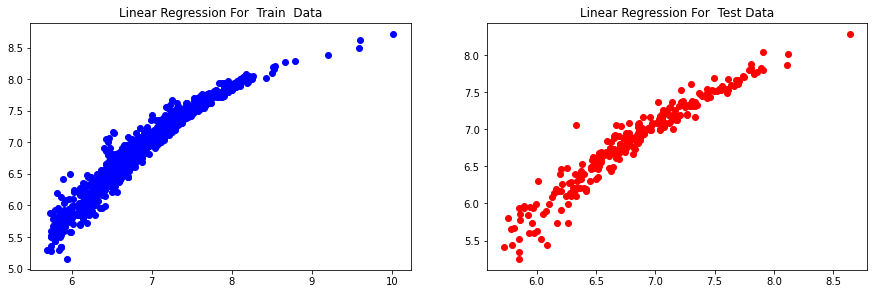

In [130]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title('Linear Regression For  Train  Data')
plt.scatter(lr.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title('Linear Regression For  Test Data')
plt.scatter(y_pred, y_test, color='red')

In [131]:
lr_df = pd.DataFrame({"predicted_price":y_pred,"actual_price":y_test})
lr_df.head(5)

,predicted_price,actual_price
0,6.482350,6.514713
1,5.724925,5.411646
2,5.997562,5.988961
3,6.282004,6.136322
4,7.368976,7.494986


## LASSO WITH OPTUNA

In [132]:
def lasso_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):

    #Parametrelerin tanımlanması
    params = {
    'alpha'             : trial.suggest_loguniform('alpha', 1e-15, 5.0), 
    'max_iter'          : trial.suggest_categorical('max_iter', [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]), 
    'tol'               : trial.suggest_loguniform('tol', 1e-9, 1e-1),

    }
    #model oluşturma ve parametreleri aktarma 
    model = Lasso(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    rmse = mean_squared_error(y_test, predection, squared=False)
    return rmse

In [138]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(lasso_optuna, n_trials=200)

[I 2023-05-25 12:20:06,830] A new study created in memory with name: no-name-0167620b-69c1-4cf8-bb00-e110db534719
[I 2023-05-25 12:20:06,837] Trial 0 finished with value: 0.16400019135924374 and parameters: {'alpha': 1.9783161273378153e-05, 'max_iter': 8000, 'tol': 2.7676677302387288e-08}. Best is trial 0 with value: 0.16400019135924374.
[I 2023-05-25 12:20:06,846] Trial 1 finished with value: 0.16398476024231692 and parameters: {'alpha': 7.889379770901591e-10, 'max_iter': 7000, 'tol': 0.005722368027479517}. Best is trial 1 with value: 0.16398476024231692.
[I 2023-05-25 12:20:06,857] Trial 2 finished with value: 0.1639847596384878 and parameters: {'alpha': 8.504468477788915e-12, 'max_iter': 7000, 'tol': 2.0528241266917027e-08}. Best is trial 2 with value: 0.1639847596384878.
[I 2023-05-25 12:20:06,863] Trial 3 finished with value: 0.168285552757835 and parameters: {'alpha': 0.007279307809077453, 'max_iter': 1000, 'tol': 0.0028881091769752897}. Best is trial 2 with value: 0.163984759638

[I 2023-05-25 12:20:08,024] Trial 34 finished with value: 0.16398475963191697 and parameters: {'alpha': 1.0845825558404284e-15, 'max_iter': 10000, 'tol': 2.6602668971412886e-05}. Best is trial 22 with value: 0.1629816312050181.
[I 2023-05-25 12:20:08,053] Trial 35 finished with value: 0.16398475963192513 and parameters: {'alpha': 1.1675471642041348e-14, 'max_iter': 10000, 'tol': 0.002272036989138125}. Best is trial 22 with value: 0.1629816312050181.
[I 2023-05-25 12:20:08,090] Trial 36 finished with value: 0.16398475963210377 and parameters: {'alpha': 2.427010876737288e-13, 'max_iter': 1000, 'tol': 0.00010071694101253161}. Best is trial 22 with value: 0.1629816312050181.
[I 2023-05-25 12:20:08,122] Trial 37 finished with value: 0.16398475963192355 and parameters: {'alpha': 9.624008307310816e-15, 'max_iter': 7000, 'tol': 0.006160622930936457}. Best is trial 22 with value: 0.1629816312050181.
[I 2023-05-25 12:20:08,147] Trial 38 finished with value: 0.1639847596366347 and parameters: {'a

[I 2023-05-25 12:20:09,307] Trial 69 finished with value: 0.16377809257861237 and parameters: {'alpha': 1.3052160413029813e-11, 'max_iter': 5000, 'tol': 0.07174999984973662}. Best is trial 58 with value: 0.16283717043237453.
[I 2023-05-25 12:20:09,338] Trial 70 finished with value: 0.16398475976299928 and parameters: {'alpha': 1.6908595713221099e-10, 'max_iter': 5000, 'tol': 0.02592386985397988}. Best is trial 58 with value: 0.16283717043237453.
[I 2023-05-25 12:20:09,361] Trial 71 finished with value: 0.16290153351449496 and parameters: {'alpha': 6.6641015423501e-13, 'max_iter': 5000, 'tol': 0.05989995628602508}. Best is trial 58 with value: 0.16283717043237453.
[I 2023-05-25 12:20:09,389] Trial 72 finished with value: 0.1637780925784733 and parameters: {'alpha': 6.027242642627696e-12, 'max_iter': 5000, 'tol': 0.08970658335713945}. Best is trial 58 with value: 0.16283717043237453.
[I 2023-05-25 12:20:09,423] Trial 73 finished with value: 0.16398475963197737 and parameters: {'alpha': 7

[I 2023-05-25 12:20:10,460] Trial 104 finished with value: 0.16307083617962675 and parameters: {'alpha': 1.6921070724787532e-13, 'max_iter': 5000, 'tol': 0.04586374058246238}. Best is trial 86 with value: 0.1627963943127615.
[I 2023-05-25 12:20:10,500] Trial 105 finished with value: 0.16398475963350695 and parameters: {'alpha': 2.0555825409998947e-12, 'max_iter': 6000, 'tol': 0.011316435608359635}. Best is trial 86 with value: 0.1627963943127615.
[I 2023-05-25 12:20:10,526] Trial 106 finished with value: 0.16283717043233217 and parameters: {'alpha': 6.122354846406156e-14, 'max_iter': 3000, 'tol': 0.0677139628984285}. Best is trial 86 with value: 0.1627963943127615.
[I 2023-05-25 12:20:10,561] Trial 107 finished with value: 0.16398475963196774 and parameters: {'alpha': 6.669542921299563e-14, 'max_iter': 3000, 'tol': 0.022250281460990475}. Best is trial 86 with value: 0.1627963943127615.
[I 2023-05-25 12:20:10,593] Trial 108 finished with value: 0.1637780925783547 and parameters: {'alpha

[I 2023-05-25 12:20:11,709] Trial 139 finished with value: 0.16398475963316392 and parameters: {'alpha': 1.6116736883387602e-12, 'max_iter': 6000, 'tol': 0.01793949312029858}. Best is trial 86 with value: 0.1627963943127615.
[I 2023-05-25 12:20:11,741] Trial 140 finished with value: 0.16290153351440953 and parameters: {'alpha': 5.5772795433951236e-14, 'max_iter': 7000, 'tol': 0.059821646439490034}. Best is trial 86 with value: 0.1627963943127615.
[I 2023-05-25 12:20:11,777] Trial 141 finished with value: 0.16279639431260756 and parameters: {'alpha': 1.0016560551404719e-11, 'max_iter': 9000, 'tol': 0.069497125528324}. Best is trial 141 with value: 0.16279639431260756.
[I 2023-05-25 12:20:11,814] Trial 142 finished with value: 0.16283717043253657 and parameters: {'alpha': 3.4545979241283074e-12, 'max_iter': 2000, 'tol': 0.0685704297103008}. Best is trial 141 with value: 0.16279639431260756.
[I 2023-05-25 12:20:11,850] Trial 143 finished with value: 0.16307083618067605 and parameters: {'a

[I 2023-05-25 12:20:13,120] Trial 174 finished with value: 0.1628371704323295 and parameters: {'alpha': 1.6240775718014615e-14, 'max_iter': 8000, 'tol': 0.0691794171627845}. Best is trial 141 with value: 0.16279639431260756.
[I 2023-05-25 12:20:13,164] Trial 175 finished with value: 0.1639847596319305 and parameters: {'alpha': 1.8533134374326287e-14, 'max_iter': 8000, 'tol': 0.025863612098538123}. Best is trial 141 with value: 0.16279639431260756.
[I 2023-05-25 12:20:13,196] Trial 176 finished with value: 0.16449074292909474 and parameters: {'alpha': 3.987484059266591e-14, 'max_iter': 8000, 'tol': 0.09920983078447179}. Best is trial 141 with value: 0.16279639431260756.
[I 2023-05-25 12:20:13,239] Trial 177 finished with value: 0.16316377896434256 and parameters: {'alpha': 5.248180075460884e-15, 'max_iter': 8000, 'tol': 0.04134595151774531}. Best is trial 141 with value: 0.16279639431260756.
[I 2023-05-25 12:20:13,279] Trial 178 finished with value: 0.16290153351441927 and parameters: {

In [139]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 0.16279639431260756
  Params: 
    alpha: 1.0016560551404719e-11
    max_iter: 9000
    tol: 0.069497125528324


In [140]:
lasso_best  = Lasso(alpha=1.7272756099031756,max_iter=6000,tol=5.658786498274836e-07)
lasso_best.fit(x_train,y_train)
y_pred = lasso_best.predict(x_test)
print("R2 using  Lasso Regression : {:.2f} %".format(np.round(r2_score(y_test, y_pred),4)*100))

R2 using  Lasso Regression : 87.27 %


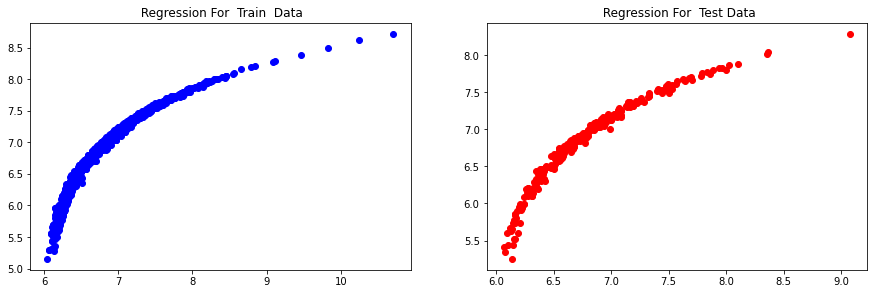

In [141]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title(' Regression For  Train  Data')
plt.scatter(lasso_best.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title(' Regression For  Test Data')
plt.scatter(y_pred, y_test, color='red')

In [142]:
lasso_df = pd.DataFrame({"predicted_price":y_pred,"actual_price":y_test})
lasso_df.head(5)

,predicted_price,actual_price
0,6.475772,6.514713
1,6.068724,5.411646
2,6.206849,5.988961
3,6.321144,6.136322
4,7.330907,7.494986


## KNN

In [143]:
def knnregressors_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define parameters
    params = {
    'n_neighbors'     : trial.suggest_categorical('n_neighbors', [1,3,5,7,9,11,13,15]), 
    'weights'         : trial.suggest_categorical('weights', ['uniform','distance']),
    'algorithm'       : trial.suggest_categorical('algorithm',['auto','ball_tree','kd_tree','brute']),
    'leaf_size'       : trial.suggest_int('leaf_size', 30, 150),
    'p'               : trial.suggest_int('p', 2, 50),
    
    }
    #creat model anf pass parameters 
    model = KNeighborsRegressor(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    rmse = mean_squared_error(y_test, predection, squared=False)
    return rmse

In [146]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(knnregressors_optuna, n_trials=200)

[I 2023-05-25 12:23:49,663] A new study created in memory with name: no-name-44a94004-c79d-44a0-a9ab-85634e5edef2
[I 2023-05-25 12:23:49,795] Trial 0 finished with value: 0.05137216560324731 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 35, 'p': 38}. Best is trial 0 with value: 0.05137216560324731.
[I 2023-05-25 12:23:49,957] Trial 1 finished with value: 0.04122226047036736 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 101, 'p': 42}. Best is trial 1 with value: 0.04122226047036736.
[I 2023-05-25 12:23:50,112] Trial 2 finished with value: 0.04113577545721559 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 139, 'p': 6}. Best is trial 2 with value: 0.04113577545721559.
[I 2023-05-25 12:23:50,253] Trial 3 finished with value: 0.04389357813819442 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 141, 'p': 

[I 2023-05-25 12:23:54,665] Trial 33 finished with value: 0.04090525097221258 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 50, 'p': 21}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:23:54,828] Trial 34 finished with value: 0.040844352263952714 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 44, 'p': 30}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:23:55,068] Trial 35 finished with value: 0.04082700520496761 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 32, 'p': 15}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:23:55,275] Trial 36 finished with value: 0.05136337460871529 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 56, 'p': 24}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:23:55,465] Trial 37 finished with valu

[I 2023-05-25 12:24:01,806] Trial 66 finished with value: 0.04696740183822805 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 92, 'p': 31}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:02,067] Trial 67 finished with value: 0.051372165603247304 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 36, 'p': 35}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:02,323] Trial 68 finished with value: 0.04164448913708776 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 43, 'p': 49}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:02,525] Trial 69 finished with value: 0.04078656832658202 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 104, 'p': 26}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:02,600] Trial 70 finished with valu

[I 2023-05-25 12:24:07,731] Trial 99 finished with value: 0.040954196900439936 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 43, 'p': 30}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:07,916] Trial 100 finished with value: 0.05814717341387439 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 63, 'p': 32}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:08,259] Trial 101 finished with value: 0.040761086487344306 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 70, 'p': 25}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:08,468] Trial 102 finished with value: 0.04090543194619914 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 78, 'p': 26}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:08,661] Trial 103 finished wit

[I 2023-05-25 12:24:15,136] Trial 132 finished with value: 0.04068769158794695 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 75, 'p': 28}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:15,352] Trial 133 finished with value: 0.04068769158794695 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 76, 'p': 28}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:15,566] Trial 134 finished with value: 0.04068769158794695 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 75, 'p': 28}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:15,842] Trial 135 finished with value: 0.04083498980591605 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 80, 'p': 29}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:16,099] Trial 136 finished with value: 0

[I 2023-05-25 12:24:21,882] Trial 165 finished with value: 0.04090543194619914 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 78, 'p': 26}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:22,130] Trial 166 finished with value: 0.04068769158794695 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 67, 'p': 28}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:22,370] Trial 167 finished with value: 0.07051215369634742 and parameters: {'n_neighbors': 13, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 71, 'p': 30}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:22,595] Trial 168 finished with value: 0.046250116040594744 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 83, 'p': 27}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:22,853] Trial 169 finished with value: 

[I 2023-05-25 12:24:30,215] Trial 198 finished with value: 0.041102917704504534 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 64, 'p': 32}. Best is trial 14 with value: 0.04068446007670236.
[I 2023-05-25 12:24:30,331] Trial 199 finished with value: 0.04070805797253155 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 72, 'p': 26}. Best is trial 14 with value: 0.04068446007670236.


In [147]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 0.04068446007670236
  Params: 
    n_neighbors: 5
    weights: distance
    algorithm: kd_tree
    leaf_size: 64
    p: 26


In [148]:
knn_best = KNeighborsRegressor(n_neighbors=5,algorithm='brute', p=2, weights='distance',leaf_size=93)
knn_best.fit(x_train,y_train)
y_pred = knn_best.predict(x_test)
print("R2 using Knn Regressors: {:.2f} %".format(np.round(r2_score(y_test, y_pred),4)*100))

R2 using Knn Regressors: 99.52 %


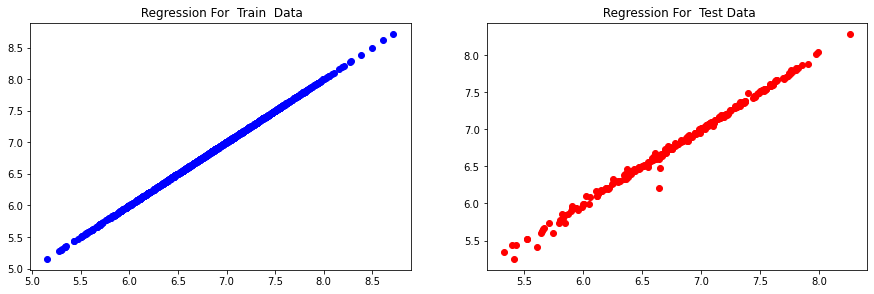

In [149]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title(' Regression For  Train  Data')
plt.scatter(knn_best.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title(' Regression For  Test Data')
plt.scatter(y_pred, y_test, color='red')

In [150]:
knn_df = pd.DataFrame({"predicted_price":y_pred,"actual_price":y_test})
knn_df.head(5)

,predicted_price,actual_price
0,6.515291,6.514713
1,5.608298,5.411646
2,6.004940,5.988961
3,6.127029,6.136322
4,7.485270,7.494986


## Random Forest

In [151]:
def randomforest_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    params = {

    'criterion'        : trial.suggest_categorical('criterion', ['squared_error', 'absolute_error', 'poisson']),
    'bootstrap'        : trial.suggest_categorical('bootstrap',['True','False']),
    'max_depth'        : trial.suggest_int('max_depth', 1, 10000),
    'max_features'     : trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
    'max_leaf_nodes'   : trial.suggest_int('max_leaf_nodes', 1, 10000),
    'n_estimators'     : trial.suggest_int('n_estimators', 30, 1000),


    }
    #creat model anf pass parameters 
    model = RandomForestRegressor(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    rmse = mean_squared_error(y_test, predection, squared=False)
    return rmse

In [154]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(randomforest_optuna, n_trials=200)

[I 2023-05-25 12:27:26,422] A new study created in memory with name: no-name-bcfb49b6-a055-4958-855e-1dde8c963474
[I 2023-05-25 12:27:51,765] Trial 0 finished with value: 0.04872473023828678 and parameters: {'criterion': 'poisson', 'bootstrap': 'False', 'max_depth': 2403, 'max_features': 'auto', 'max_leaf_nodes': 9484, 'n_estimators': 231}. Best is trial 0 with value: 0.04872473023828678.
[I 2023-05-25 12:27:53,198] Trial 1 finished with value: 0.072887438082088 and parameters: {'criterion': 'squared_error', 'bootstrap': 'False', 'max_depth': 6986, 'max_features': 'sqrt', 'max_leaf_nodes': 5052, 'n_estimators': 595}. Best is trial 0 with value: 0.04872473023828678.
[I 2023-05-25 12:27:53,906] Trial 2 finished with value: 0.005080784227284455 and parameters: {'criterion': 'squared_error', 'bootstrap': 'False', 'max_depth': 3054, 'max_features': 'auto', 'max_leaf_nodes': 5404, 'n_estimators': 156}. Best is trial 2 with value: 0.005080784227284455.
[I 2023-05-25 12:27:56,038] Trial 3 fini

[I 2023-05-25 12:31:39,838] Trial 28 finished with value: 0.00556040690209081 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 804, 'max_features': 'auto', 'max_leaf_nodes': 6728, 'n_estimators': 168}. Best is trial 22 with value: 0.004922519994472521.
[I 2023-05-25 12:31:40,995] Trial 29 finished with value: 0.006126084884212084 and parameters: {'criterion': 'squared_error', 'bootstrap': 'False', 'max_depth': 2125, 'max_features': 'auto', 'max_leaf_nodes': 9946, 'n_estimators': 226}. Best is trial 22 with value: 0.004922519994472521.
[I 2023-05-25 12:31:43,228] Trial 30 finished with value: 0.19357833560220103 and parameters: {'criterion': 'poisson', 'bootstrap': 'False', 'max_depth': 2936, 'max_features': 'log2', 'max_leaf_nodes': 8945, 'n_estimators': 405}. Best is trial 22 with value: 0.004922519994472521.
[I 2023-05-25 12:32:05,395] Trial 31 finished with value: 0.004705968671701279 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'Fal

[I 2023-05-25 12:36:55,230] Trial 56 finished with value: 0.07442051590328205 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'True', 'max_depth': 9666, 'max_features': 'log2', 'max_leaf_nodes': 1425, 'n_estimators': 390}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:37:05,364] Trial 57 finished with value: 0.07380658403096065 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 7300, 'max_features': 'sqrt', 'max_leaf_nodes': 3091, 'n_estimators': 869}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:37:49,503] Trial 58 finished with value: 0.048612927784433414 and parameters: {'criterion': 'poisson', 'bootstrap': 'False', 'max_depth': 9307, 'max_features': 'auto', 'max_leaf_nodes': 625, 'n_estimators': 530}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:38:04,974] Trial 59 finished with value: 0.0054281729973970645 and parameters: {'criterion': 'absolute_error', 'bootstrap': 

[I 2023-05-25 12:43:34,832] Trial 84 finished with value: 0.0057615719190339375 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 5271, 'max_features': 'auto', 'max_leaf_nodes': 4818, 'n_estimators': 268}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:43:55,900] Trial 85 finished with value: 0.005279897731811486 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 174, 'max_features': 'auto', 'max_leaf_nodes': 983, 'n_estimators': 602}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:44:03,504] Trial 86 finished with value: 0.005308246334743933 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 4513, 'max_features': 'auto', 'max_leaf_nodes': 4111, 'n_estimators': 215}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:44:37,417] Trial 87 finished with value: 0.04877364608038463 and parameters: {'criterion': 'poisson', 'bootstrap':

[I 2023-05-25 12:49:20,321] Trial 112 finished with value: 0.004603193222775298 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 3835, 'max_features': 'auto', 'max_leaf_nodes': 4564, 'n_estimators': 170}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:49:26,788] Trial 113 finished with value: 0.004744679229331435 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 5642, 'max_features': 'auto', 'max_leaf_nodes': 4371, 'n_estimators': 178}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:49:33,625] Trial 114 finished with value: 0.005325706219896429 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 5744, 'max_features': 'auto', 'max_leaf_nodes': 4551, 'n_estimators': 179}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:49:40,544] Trial 115 finished with value: 0.004765115207265204 and parameters: {'criterion': 'absolute_error',

[I 2023-05-25 12:53:24,993] Trial 139 finished with value: 0.005128665951050206 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'True', 'max_depth': 4364, 'max_features': 'auto', 'max_leaf_nodes': 4899, 'n_estimators': 633}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:53:50,659] Trial 140 finished with value: 0.0050859495382225475 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 2337, 'max_features': 'auto', 'max_leaf_nodes': 6777, 'n_estimators': 811}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:54:03,713] Trial 141 finished with value: 0.005122314021006433 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 2819, 'max_features': 'auto', 'max_leaf_nodes': 8298, 'n_estimators': 430}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:54:15,044] Trial 142 finished with value: 0.0055393527572146035 and parameters: {'criterion': 'absolute_error'

[I 2023-05-25 12:59:02,617] Trial 167 finished with value: 0.005331279738268014 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 5868, 'max_features': 'auto', 'max_leaf_nodes': 6219, 'n_estimators': 512}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:59:03,384] Trial 168 finished with value: 0.006204086776040838 and parameters: {'criterion': 'squared_error', 'bootstrap': 'False', 'max_depth': 7863, 'max_features': 'auto', 'max_leaf_nodes': 6394, 'n_estimators': 177}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:59:21,437] Trial 169 finished with value: 0.005230932152774431 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 1928, 'max_features': 'auto', 'max_leaf_nodes': 5690, 'n_estimators': 602}. Best is trial 47 with value: 0.0045350277529756415.
[I 2023-05-25 12:59:29,760] Trial 170 finished with value: 0.005236597111748949 and parameters: {'criterion': 'absolute_error', 

[I 2023-05-25 13:02:17,006] Trial 195 finished with value: 0.0046762910507441606 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 6613, 'max_features': 'auto', 'max_leaf_nodes': 5808, 'n_estimators': 159}. Best is trial 173 with value: 0.004397824378885849.
[I 2023-05-25 13:02:21,886] Trial 196 finished with value: 0.005472490710177545 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 6644, 'max_features': 'auto', 'max_leaf_nodes': 5693, 'n_estimators': 165}. Best is trial 173 with value: 0.004397824378885849.
[I 2023-05-25 13:02:24,852] Trial 197 finished with value: 0.0047352446543604135 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 6172, 'max_features': 'auto', 'max_leaf_nodes': 5876, 'n_estimators': 99}. Best is trial 173 with value: 0.004397824378885849.
[I 2023-05-25 13:02:27,850] Trial 198 finished with value: 0.0045631285818421114 and parameters: {'criterion': 'absolute_error

In [155]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 0.004397824378885849
  Params: 
    criterion: absolute_error
    bootstrap: False
    max_depth: 926
    max_features: auto
    max_leaf_nodes: 5950
    n_estimators: 135


In [156]:
rf = RandomForestRegressor(bootstrap= False,max_depth=7407,criterion='squared_error',max_features='log2',max_leaf_nodes= 4365,n_estimators= 59)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_test, y_pred_rf),4)*100))

R2 using Random Forest: 98.84 %


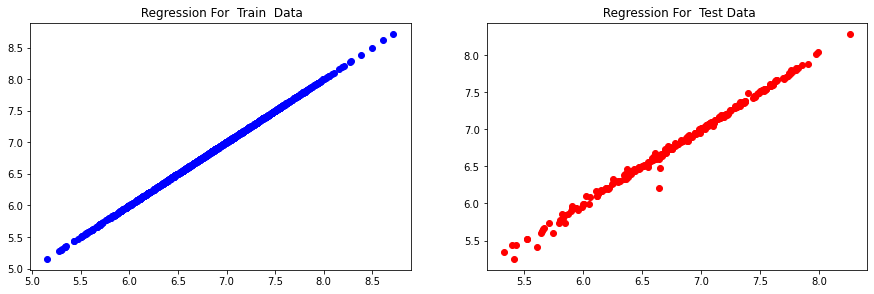

In [157]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title(' Regression For  Train  Data')
plt.scatter(rf.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title(' Regression For  Test Data')
plt.scatter(y_pred, y_test, color='red')

In [158]:
rf_df = pd.DataFrame({"predicted_price":y_pred,"actual_price":y_test})
rf_df.head(5)

,predicted_price,actual_price
0,6.515291,6.514713
1,5.608298,5.411646
2,6.004940,5.988961
3,6.127029,6.136322
4,7.485270,7.494986
